In [2]:
file='20200917_guppi_59046_53079_001660_J0825-5010_0001-ics.rawspec.0000.combined.fil'

In [2]:
%matplotlib inline
import matplotlib
import pylab as plt
from blimpy import Waterfall
import numpy as np
from scipy import interpolate
import peakutils
import rfi
import turbo_seti
import pandas as pd
import BaselineRemoval
from scipy.sparse import csc_matrix, eye, diags
from scipy.sparse.linalg import spsolve
import scipy
import os
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [35]:
BaselineRemoval

<module 'BaselineRemoval' from '/home/zaynamell/.local/lib/python3.8/site-packages/BaselineRemoval.py'>

In [3]:
test=Waterfall(file)

In [4]:
test.grab_data()

(array([ 856.        ,  856.20898438,  856.41796875, ..., 1497.37304688,
        1497.58203125, 1497.79101562]),
 array([[292522.12 ,  13124.256,  13145.54 , ...,  39680.414,  41392.902,
          43924.14 ],
        [ 41721.24 ,  39116.93 ,  39151.902, ...,  63911.57 ,  64003.26 ,
          63868.91 ],
        [ 63910.875,  63901.47 ,  63844.91 , ...,  75657.375,  75547.83 ,
          75732.04 ],
        ...,
        [ 59638.023,  56741.707,  56498.37 , ...,  64096.746,  63998.613,
          63988.715],
        [ 63891.65 ,  63949.766,  63986.72 , ...,  75675.09 ,  75565.81 ,
          75714.02 ],
        [ 73225.336,  73109.75 ,  73075.82 , ...,  87672.03 ,  87808.36 ,
          87669.56 ]], dtype=float32))

In [27]:
import peakutils

In [305]:
w.container.n_channels_in_file

3072

extracting integration 0...
extracting integration 0...


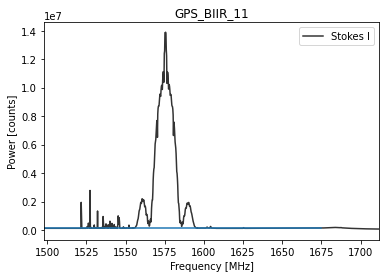

In [137]:
gps="data/20200917_guppi_59143_55142_000486_GPS-BIIR-11_0001-ics.rawspec.combined.fil"
w=Waterfall(gps)
w.plot_spectrum()
f=w.get_freqs()
power=w.get_power()[1]
base=peakutils.baseline(power[:847],deg=1,tol=1e-2)
plt.plot(f[:847],base)
plt.plot(x,chan,'--')

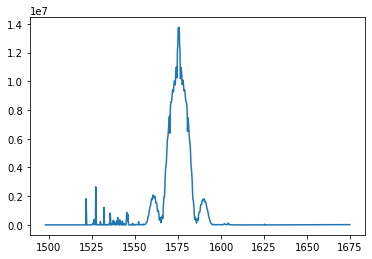

In [143]:
tol=power[:847]-base
plt.plot(f[:847],tol)

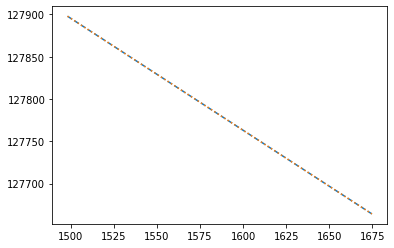

In [142]:
m,b=np.polyfit(f[:847],base,deg=1)
plt.plot(f[:847],base,'--',f[:847],m*f[:847]+b,":")

In [148]:
knots=np.linspace(w.container.f_start,w.container.f_stop,10)
knots

array([ 856.        ,  927.33333333,  998.66666667, 1070.        ,
       1141.33333333, 1212.66666667, 1284.        , 1355.33333333,
       1426.66666667, 1498.        ])

In [299]:
w.container.n_channels_in_file

3072

extracting integration 0...
extracting integration 0...


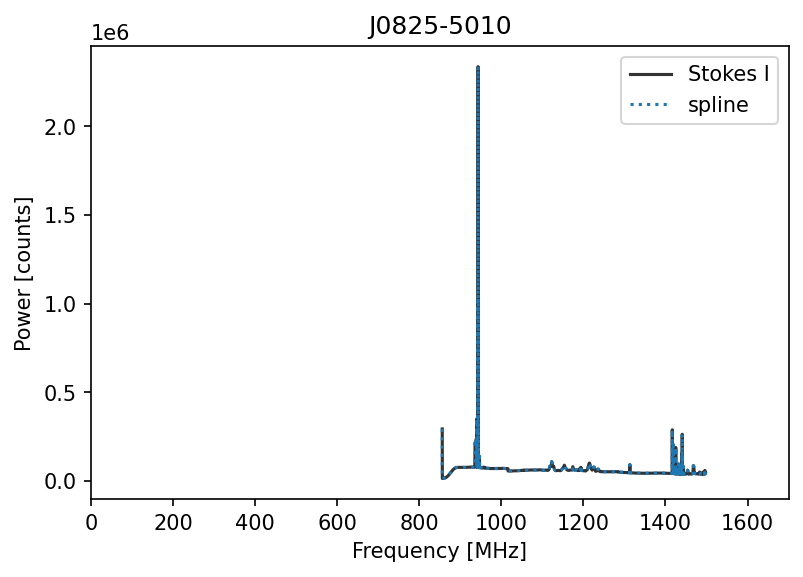

In [4]:
plt.figure(dpi=150)
w=Waterfall("data/20200917_guppi_59046_53079_001660_J0825-5010_0001-ics.rawspec.0000.combined.fil")
x=w.get_freqs()
knots=np.linspace(w.container.f_start,w.container.f_stop,10)
spl=interpolate.splrep(x,w.get_power()[1])
chan=interpolate.splev(x,spl)
w.plot_spectrum()
plt.plot(x,chan,":",label="spline")
plt.xlim(0,1700)
plt.legend()

In [205]:
w.header

{'machine_id': 20,
 'telescope_id': -1,
 'data_type': 1,
 'fch1': 856.0,
 'foff': 0.208984375,
 'nchans': 3072,
 'source_name': 'J0825-5010',
 'src_raj': <Angle 8.43386389 hourangle>,
 'src_dej': <Angle -47.24847222 deg>,
 'az_start': 0.0,
 'za_start': 0.0,
 'nbits': 32,
 'tstart': 59046.61435185185,
 'tsamp': 0.31359282242990655,
 'nifs': 1}

In [204]:
856+0.208984375*3072

1498.0

In [80]:
tol=chan-w.get_power()[1]
chan.shape

extracting integration 0...


(3072,)

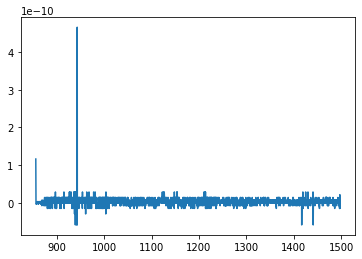

In [65]:
plt.plot(x,tol)

extracting integration 0...
(23,)
extracting integration 0...


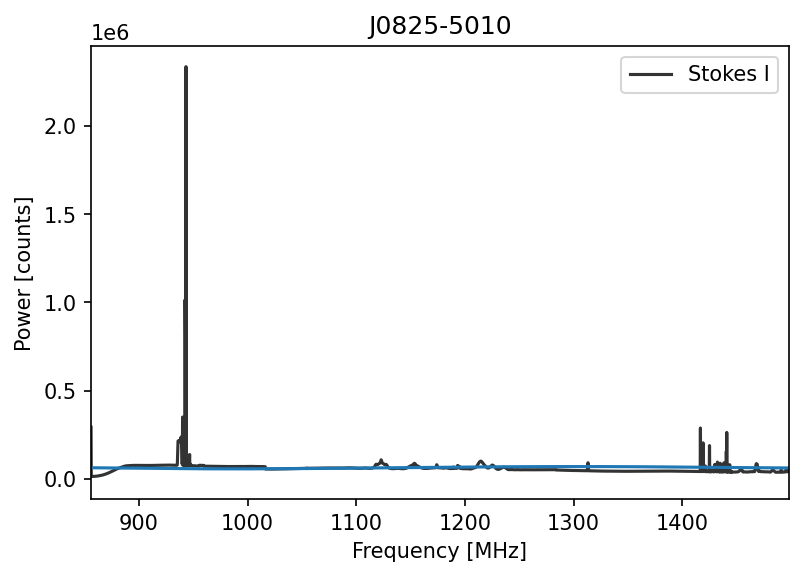

In [5]:
plt.figure(dpi=150)
channel_width=3072
spl_order=16
integrated_channel=w.get_power()[1]
x = np.arange(channel_width)
knots = np.arange(0, channel_width, channel_width//spl_order+1)
spl = interpolate.splrep(x, integrated_channel, t=knots[1:],task=0,s=0)
chan_fit = interpolate.splev(x, spl)
print(spl[0].shape)
w.plot_spectrum()
plt.plot(x,chan_fit)

In [31]:
x=w.get_freqs()
np.where(x>1000)

(array([ 690,  691,  692, ..., 3069, 3070, 3071]),)

In [407]:
knots

array([  0, 240])

extracting integration 0...


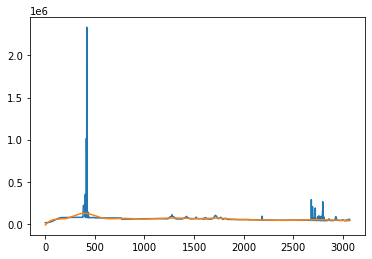

In [27]:
x=np.arange(0,3072,1)[500:1000]
y=w.get_power()[1][500:1000]
plt.plot(x,y)
knots = np.arange(0, 3072, 3072//16+1)
spl = interpolate.splrep(x, y, t=knots[1:])
chan_fit = interpolate.splev(x, spl)
plt.plot(x,chan_fit)

extracting integration 0...
(23,)
extracting integration 0...


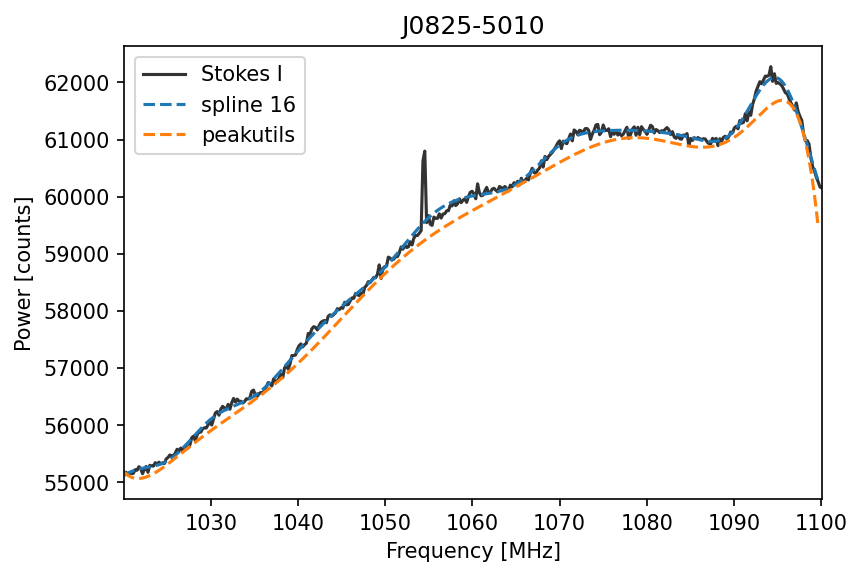

In [34]:
plt.figure(dpi=150)
channel_width=1167-785
spl_order=16
x=w.get_freqs()[785:1167]
integrated_channel=w.get_power()[1][785:1167]
knots = np.arange(0, channel_width, channel_width//spl_order+1)
spl = interpolate.splrep(x, integrated_channel,t=x[0]+knots[1:]*w.header['foff'])
chan_fit = interpolate.splev(x, spl)
print(spl[0].shape)
w.plot_spectrum(f_start=1020,f_stop=1100)
plt.plot(x,chan_fit,'--',label='spline '+str(spl_order))
base=peakutils.baseline(integrated_channel,deg=10)
plt.plot(x,base,'--',label='peakutils')
plt.legend()

extracting integration 0...


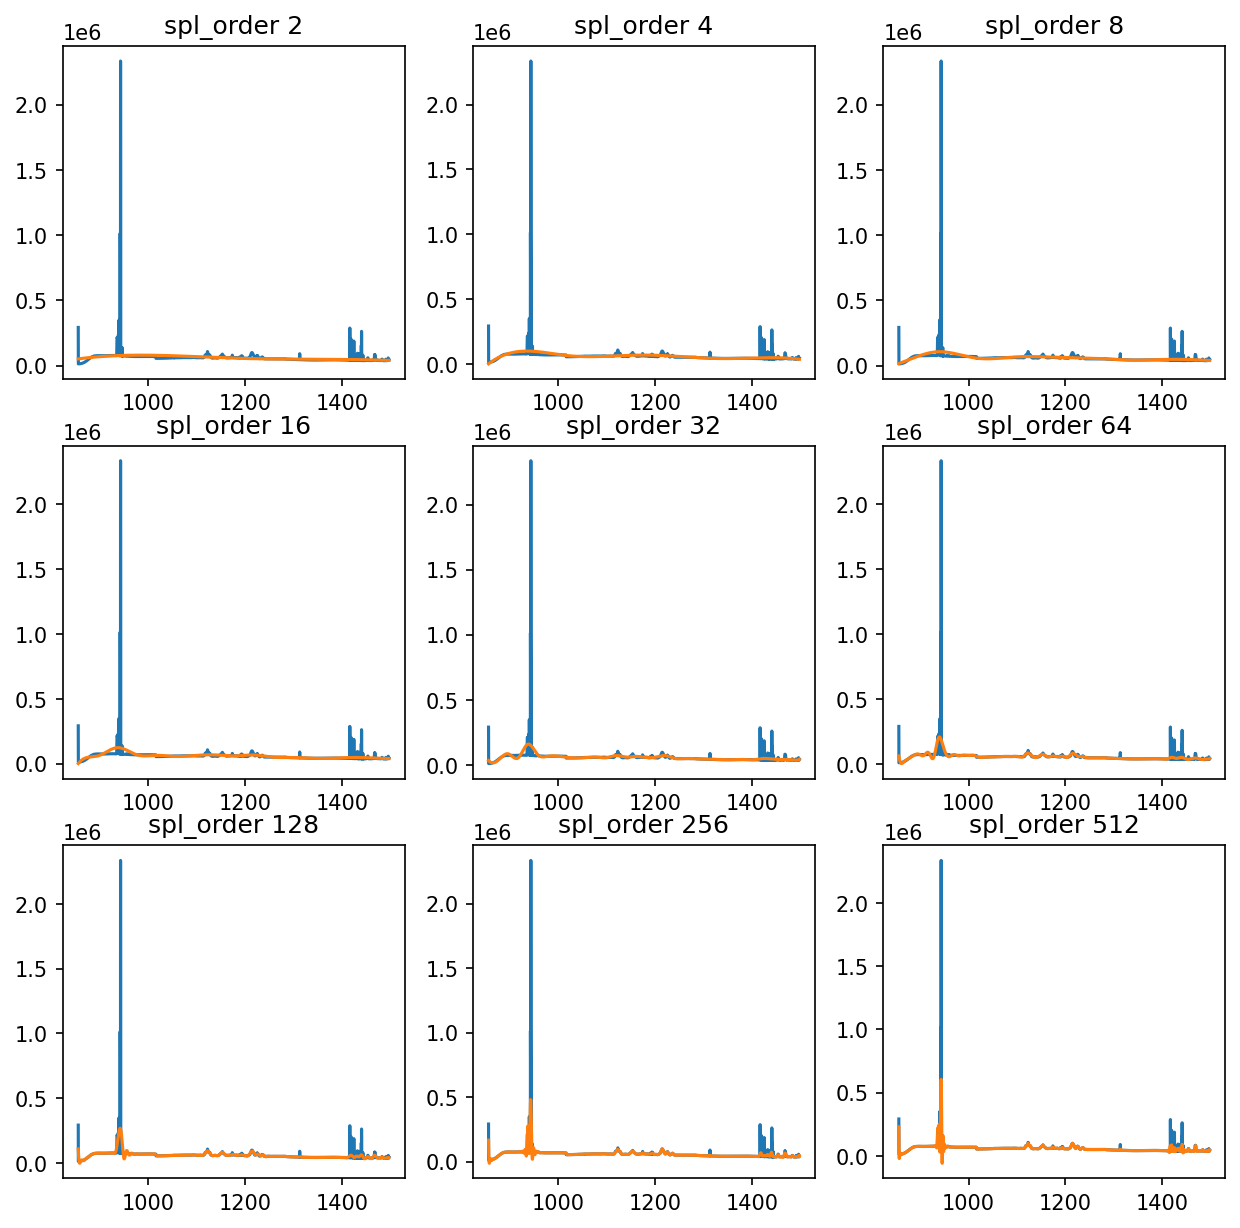

In [297]:
channel_width=3072
x=w.get_freqs()
integrated_channel=w.get_power()[1]
fig,ax=plt.subplots(3,3,dpi=150,figsize=(10,10))
chan=np.ones((3,3))
for i in range(0,9):
    spl_order=2**(i+1)
    knots = np.arange(0, channel_width, channel_width//spl_order+1)
    spl = interpolate.splrep(x, integrated_channel,t=856.0+knots[1:]*w.header['foff'])
    chan_fit = interpolate.splev(x, spl)
    if i==0 or i==1 or i==2:
        ax[0,i].plot(x,integrated_channel)
        ax[0,i].plot(x,chan_fit)
        ax[0,i].set_title("spl_order "+str(2**(i+1)))
    elif i==3 or i==4 or i==5:
        ax[1,i-3].plot(x,integrated_channel)
        ax[1,i-3].plot(x,chan_fit)
        ax[1,i-3].set_title("spl_order "+str(2**(i+1)))
    elif i==6 or i==7 or i==8:
        ax[2,i-6].plot(x,integrated_channel)
        ax[2,i-6].plot(x,chan_fit)
        ax[2,i-6].set_title("spl_order "+str(2**(i+1)))
plt.savefig('spl_order.pdf')
plt.show()

extracting integration 0...
extracting integration 0...


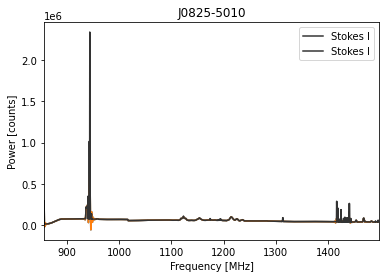

In [278]:
ax[1,1]=plt.plot(x,chan_fit)
ax[1,1]=w.plot_spectrum()
ax[2,1]=plt.plot(x,chan_fit)
ax[2,1]=w.plot_spectrum()

In [302]:
import rfi
import peakutils

extracting integration 0...
extracting integration 0...


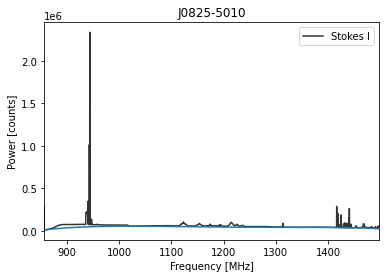

In [304]:
w.plot_spectrum()
power=w.get_power()[1]
base=peakutils.baseline(power,deg=4)
plt.plot(w.get_freqs(),base)

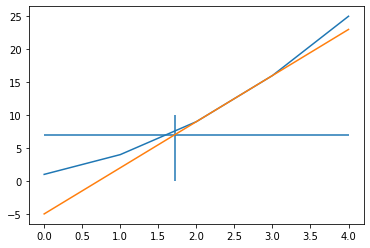

In [82]:
x=np.array([0,1,2,3,4])
y=np.array([1,4,9,16,25])
plt.hlines(7,0,4)
plt.plot(x,y)
line=(16-9)*(x-2)/(3-2)+9
plt.plot(x,line)
plt.vlines((3-2)*(7-9)/(16-9)+2,0,10)

extracting integration 0...


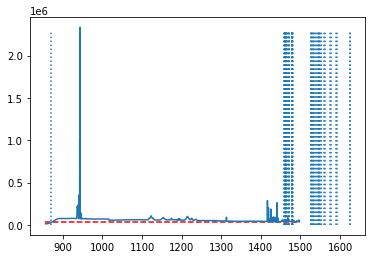

In [40]:
f=w.get_freqs()[1:]
power=w.get_power()[1][1:]
base=peakutils.baseline(power,deg=3)
nbase=np.where(base<0,0,base)
rm=power-nbase
maxi=np.amax(rm)
thres=maxi/60
nrm=np.where(rm<0,np.nan,rm)
plt.hlines(thres,w.container.f_begin,w.container.f_end,color='r',linestyle='--')
#plt.plot(f,rm)
plt.plot(f,power)
plt.vlines(intercept,0,maxi,linestyles='dotted')
#plt.xlim(1310,1320)
# for i in test:
#     plt.bar((i[1]+i[0])/2,maxi,width=i[1]-i[0],bottom=0.0)

In [118]:
test

[[881.8896968862043, 881.8896968862043],
 [930.6943192492796, 947.3946707796351],
 [1122.3848639813623, 1123.4984579950508],
 [1212.8853438845351, 1216.3842091516187],
 [1313.1997575197074, 1313.3011056553382],
 [1416.524791446394, 1469.1773189731243]]

In [97]:
intercept=[]
for i in range(len(rm)-1):
    if rm[i]==thres:
        intercept.append(f[i])
    elif (rm[i]-thres)*(rm[i+1]-thres)<0:
        x_i=(thres-rm[i])*(f[i+1]-f[i])/(rm[i+1]-rm[i])+f[i]
        intercept.append(x_i)
print(intercept)

[881.8896968862043, 930.6943192492796, 935.2477291540524, 940.4283065389465, 941.0702104504473, 941.6702061699776, 942.3113707746544, 943.7723277907639, 946.3138665485573, 946.8866026813378, 947.2882123153795, 947.3946707796351, 1122.3848639813623, 1123.4984579950508, 1212.8853438845351, 1216.3842091516187, 1313.1997575197074, 1313.3011056553382, 1416.524791446394, 1416.8852854746726, 1419.0069767544396, 1419.5630439792733, 1424.9044983674698, 1425.2243512257842, 1429.8398572884723, 1429.9142603424964, 1430.2578847614668, 1430.5016194646494, 1432.3040244243014, 1432.5957293545744, 1434.8142774247838, 1434.947759205043, 1435.7157219667154, 1435.729428466458, 1438.1346913206175, 1438.4637851858631, 1438.7952238427094, 1438.9810962881488, 1440.3820586112465, 1440.7287076992793, 1440.7424935773015, 1441.1225903401573, 1443.636357011437, 1443.6922943397421, 1467.6575084712463, 1469.1773189731243]


In [88]:
x_i=(thres-power[84])*(f[84+1]-f[i])/(power[84+1]-power[84])+x[84]

IndexError: index 84 is out of bounds for axis 0 with size 5

In [89]:
power[84]

37790.535

In [106]:
i=0
test=[]
dist=30
while i<len(intercept)-1:
    start=intercept[i]
    if(intercept[i+1]-start<=dist):
        end=intercept[i+1]
        length=len(intercept[i+1:])
        for j in range(length):
            if j==length-1:
                end=intercept[i+1:][j]
                i+=j+1
                test.append([start,end])
                break
            else:
                if (abs(intercept[i+1:][j]-end)<=dist):
                    end=intercept[i+1:][j]
                else:
                    i+=j+1
                    if(j==0):
                        test.append([start,start])
                    else:
                        test.append([start,end])
                    break
    else:
        test.append([start,start])
        i+=1

[[881.8896968862043, 881.8896968862043],
 [930.6943192492796, 947.3946707796351],
 [1122.3848639813623, 1123.4984579950508],
 [1212.8853438845351, 1216.3842091516187],
 [1313.1997575197074, 1313.3011056553382],
 [1416.524791446394, 1469.1773189731243]]

In [127]:
type(w)==Waterfall

True

In [6]:
w.container.f_start==(544.0 or 856.0)

False

In [5]:
rfi.rfi(w)

extracting integration 0...


[[881.8896968862043, 881.8896968862043],
 [930.6943192492796, 947.3946707796351],
 [1122.3848639813623, 1123.4984579950508],
 [1212.8853438845351, 1216.3842091516187],
 [1313.1997575197074, 1313.3011056553382],
 [1416.524791446394, 1469.1773189731243]]

In [20]:
wf=Waterfall("data/20200917_guppi_59074_56719_004562_J0835-4510_0001-ics.rawspec.0000.combined.fil")
test=rfi.rfi(wf)

AttributeError: module 'rfi' has no attribute 'rfi'

In [ ]:
wf.plot_spectrum()
maxi=np.amax(wf.get_power()[1])
for i in test:
    plt.bar((i[1]+i[0])/2,maxi,width=i[1]-i[0],bottom=0.0)

In [ ]:
f=wf.get_freqs()[1:]
power=wf.get_power()[1][1:]
base=peakutils.baseline(power,deg=3)
nbase=np.where(base<0,0,base)
rm=power-nbase
maxi=np.amax(rm)
thres=maxi/60
nrm=np.where(rm<0,np.nan,rm)
plt.hlines(thres,wf.container.f_begin,wf.container.f_end,color='r',linestyle='--')
plt.plot(f,rm)
#plt.plot(f,power)
intercept=[]
for i in range(len(rm)-1):
    if rm[i]==thres:
        intercept.append(f[i])
    elif (rm[i]-thres)*(rm[i+1]-thres)<0:
        x_i=(thres-rm[i])*(f[i+1]-f[i])/(rm[i+1]-rm[i])+f[i]
        intercept.append(x_i)
print(intercept)
plt.vlines(intercept,0,maxi,linestyles='dotted')

In [ ]:
test=BaselineRemoval.BaselineRemoval(power)
n_1=test.IModPoly()
n_2=test.ModPoly()
n_3=test.ZhangFit()
n_3=np.where(n_3<0,0,n_3)
plt.plot(f,power)
plt.plot(f,n_3)

In [ ]:
t=peakutils.baseline(n_3)
plt.plot(f,n_3)
#plt.yscale('log')
plt.plot(f,t)
#plt.yscale('log')
plt.ylim(0,62000)
plt.xlim(1020,1060)

In [21]:
def WhittakerSmooth(x,w,lambda_,differences=1):
    X=np.matrix(x)
    m=X.size
    i=np.arange(0,m)
    E=eye(m,format='csc')
    D=E[1:]-E[:-1] # numpy.diff() does not work with sparse matrix. This is a workaround.
    W=diags(w,0,shape=(m,m))
    A=csc_matrix(W+(lambda_*D.T*D))
    B=csc_matrix(W*X.T)
    background=spsolve(A,B)
    return np.array(background)

yorig=np.array(power)
corrected=[]
lambda_=100
porder=1
itermax=15

m=yorig.shape[0]
w=np.ones(m)
for i in range(1,itermax+1):
    corrected=WhittakerSmooth(yorig,w,lambda_, porder)
    d=yorig-corrected
    dssn=np.abs(d[d<0].sum())
    if(dssn<0.001*(abs(yorig)).sum() or i==itermax):
        if(i==itermax): print('WARING max iteration reached!')
        break
    w[d>=0]=0 # d>0 means that this point is part of a peak, so its weight is set to 0 in order to ignore it
    w[d<0]=np.exp(i*np.abs(d[d<0])/dssn)
    w[0]=np.exp(i*(d[d<0]).max()/dssn) 
    w[-1]=w[0]
yorig-corrected

NameError: name 'power' is not defined

In [108]:
n_3.shape

(3071,)

In [17]:
plt.figure(dpi=150)
plt.plot(f,power)
plt.plot(f,background)
# plt.ylim(55000,62000)
# plt.xlim(1020,1060)

NameError: name 'power' is not defined

<Figure size 900x600 with 0 Axes>

In [3]:
path='data/new/'
files=os.listdir(path)
files.remove('.ipynb_checkpoints')

In [48]:
wf=[]
for i in files:
    print(i)
    wf.append(Waterfall(path+i))

guppi_58997_62929_013900_J0825-5010_offset_0001-ics.rawspec.0000.combined.fil
guppi_59046_55641_001788_J0835-4510_0001-ics.rawspec.0000.combined.fil
guppi_59019_60337_004651_J0835-4510_0001-ics.rawspec.0000.combined.fil
guppi_58997_63731_014002_J0825-5010_offset_0001-ics.rawspec.0000.combined.fil
guppi_58997_65135_014180_J0825-5010_offset_0001-ics.rawspec.0000.combined.fil
guppi_58997_64634_014116_J0825-5010_offset_0001-ics.rawspec.0000.combined.fil
guppi_58997_60656_013613_J0825-5010_offset_0001-ics.rawspec.0000.combined.fil
guppi_59046_53860_001699_J0918-1205_offset_0001-ics.rawspec.0000.combined.fil
guppi_58997_61268_013690_J0825-5010_offset_0001-ics.rawspec.0000.combined.fil
guppi_59018_46975_001377_J0835-4510_0001-ics.rawspec.0000.combined.fil
guppi_59046_57164_001864_J0918-1205_offset_0001-ics.rawspec.0000.combined.fil
guppi_59019_55856_002388_J0835-4510_0001-ics.rawspec.0000.combined.fil
guppi_58997_62203_013808_J0825-5010_offset_0001-ics.rawspec.0000.combined.fil
guppi_58997_64

1.4950131877546895

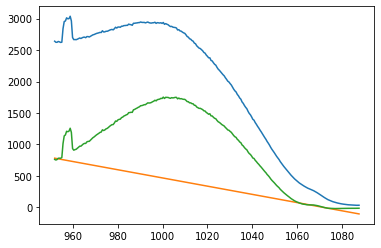

In [128]:
f1=wf[3].get_power()[0]
p1=wf[3].get_power()[1]
plt.plot(f1,p1)
t1=BaselineRemoval.BaselineRemoval(p1)
n1=t1.ZhangFit(itermax=100)
b1=peakutils.baseline(n1,deg=1)
plt.plot(f1,b1)
plt.plot(f1,n1)
n1.mean()/n1.std()

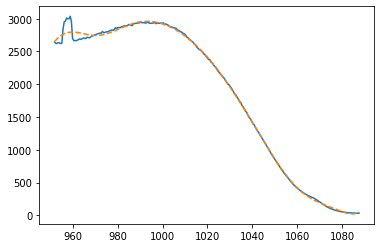

In [115]:
num=wf[3].container.n_channels_in_file
x=wf[3].get_power()[0]
power=wf[3].get_power()[1]
#power=BaselineRemoval.BaselineRemoval(power).ZhangFit()
spl_order=
knots = np.arange(wf[3].container.f_start,wf[3].container.f_stop,(wf[3].container.f_stop-wf[3].container.f_start)//spl_order+1)
spl = interpolate.splrep(x, power, t=knots[1:])
chan_fit = interpolate.splev(x, spl)
#rm=power-chan_fit
plt.plot(x,power,label="Removed baseline")
plt.plot(x,chan_fit,'--',label='spline fitting')

In [21]:
snr=[]
for i in wf:
    snr.append(i.get_power()[1].mean()/i.get_power()[1].std())

extracting integration 0...


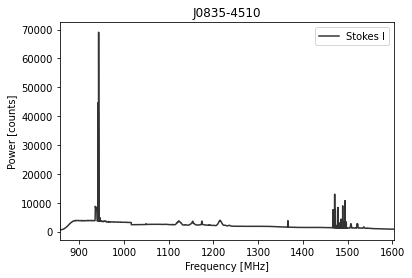

In [221]:
wf[1].plot_spectrum()

13.411287794663366
success
(array([103, 148]),)
8.555002985678021
success
(array([ 96, 103, 148]),)


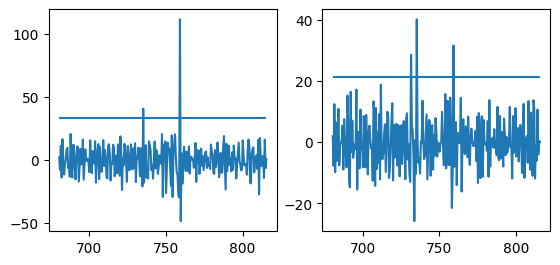

In [309]:
wf=np.array(wf)
snr=np.array(snr)
index=np.where(snr>15)
high=wf[index]
plt.figure(figsize=(10,10),dpi=100)
for i in range(len(high)):
    plt.subplot(3,3,i+1)
    num=high[i].container.n_channels_in_file
    x=high[i].get_power()[0][1:]
    p=high[i].get_power()[1][1:]
    #p=BaselineRemoval.BaselineRemoval(p).ZhangFit()
    spl_order=128
    knots = np.arange(x[0],x[-1],(x[-1]-x[0])//spl_order+1)
    spl = interpolate.splrep(x, p, t=knots[1:])
    chan_fit = interpolate.splev(x, spl)
    rm=p-chan_fit
    plt.plot(x,rm)
    print(abs(rm.std()))
#     plt.plot(x,p,label="Removed baseline")
#     plt.plot(x,chan_fit,'--',label='spline fitting')
#     plt.xlim(100,200)
#     plt.ylim(6000,8000)
    print('success')
#plt.savefig('high.pdf')
    plt.hlines(2.5*rm.std(),x[0],x[-1])
    print(np.where(rm>2.5*rm.std()))

0.22528280023775243
0.22454556344349866
0.2775873985849506
0.2103070653195963


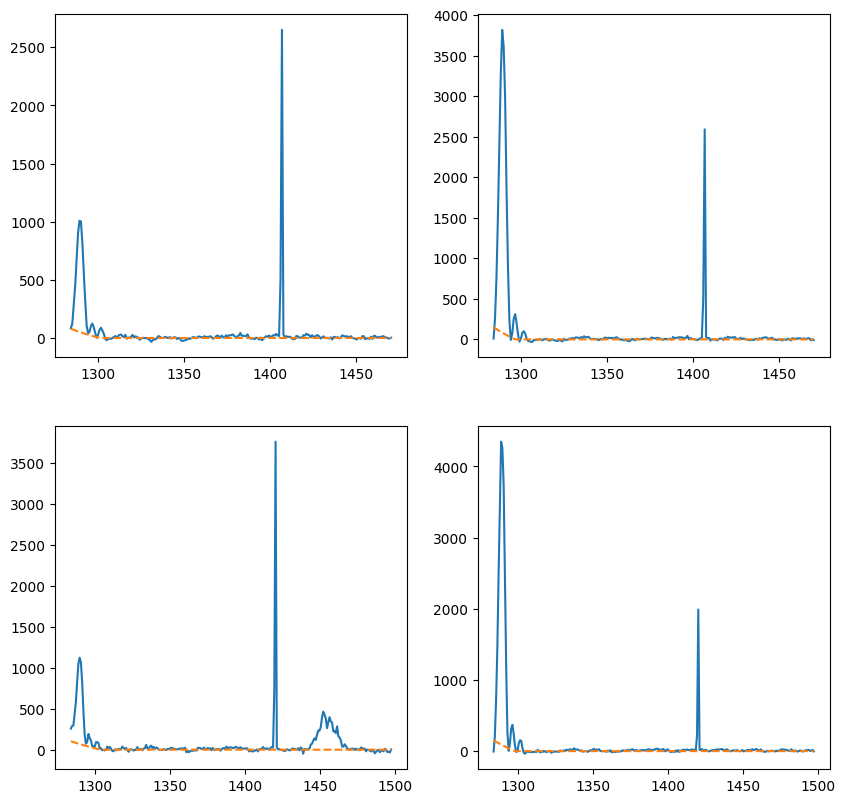

In [288]:
wf=np.array(wf)
snr=np.array(snr)
index=np.where((snr>6)&(snr<15))
med_h=wf[index]
plt.figure(figsize=(10,10),dpi=100)
j=0
for i in med_h:
    plt.subplot(2,2,j+1)
    f=i.get_power()[0]
    p=i.get_power()[1]
    rm=BaselineRemoval.BaselineRemoval(p).ZhangFit()
    base=peakutils.baseline(rm)
    base=np.where(base<0,0,base)
    rm-=base
    plt.plot(f,rm,f,base,'--')
    print(rm.mean()/rm.std())
    j+=1

(array([28]),)
(array([28]),)
(array([], dtype=int64),)


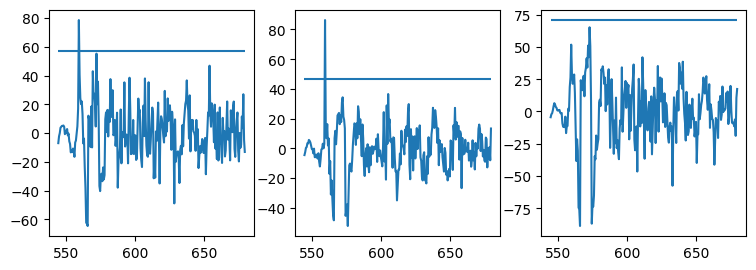

In [313]:
wf=np.array(wf)
snr=np.array(snr)
index=np.where((snr>3)&(snr<6))
med=wf[index]
plt.figure(figsize=(9,3),dpi=100)
j=0
for i in med:
    plt.subplot(1,3,j+1)
    #i.plot_spectrum()
    x=i.get_power()[0][1:]
    p=i.get_power()[1][1:]
    spl_order=16
    knots = np.arange(x[0],x[-1],(x[-1]-x[0])//spl_order+1)
    spl = interpolate.splrep(x, p, t=knots[1:])
    chan_fit = interpolate.splev(x, spl)
    rm=p-chan_fit
    print(np.where(rm>3*rm.std()))
    plt.hlines(3*rm.std(),x[0],x[-1])
    plt.plot(x,rm)
    j+=1

(array([ 7,  8,  9, 10, 11, 12, 13, 14]),)
(array([ 7,  8,  9, 10, 11, 12, 13, 14]),)
(array([ 7,  8,  9, 10, 11, 12, 13, 14]),)
(array([ 7,  8,  9, 10, 11, 12, 13, 14, 26]),)
(array([ 7,  8,  9, 10, 11, 12, 13, 14]),)
(array([ 7,  8,  9, 10, 11, 12, 13, 14]),)
(array([ 7,  8,  9, 10, 11, 12, 13, 14]),)
(array([ 7,  8,  9, 10, 11, 12, 13, 14, 26]),)
(array([ 7,  8,  9, 10, 11, 12, 13, 14]),)


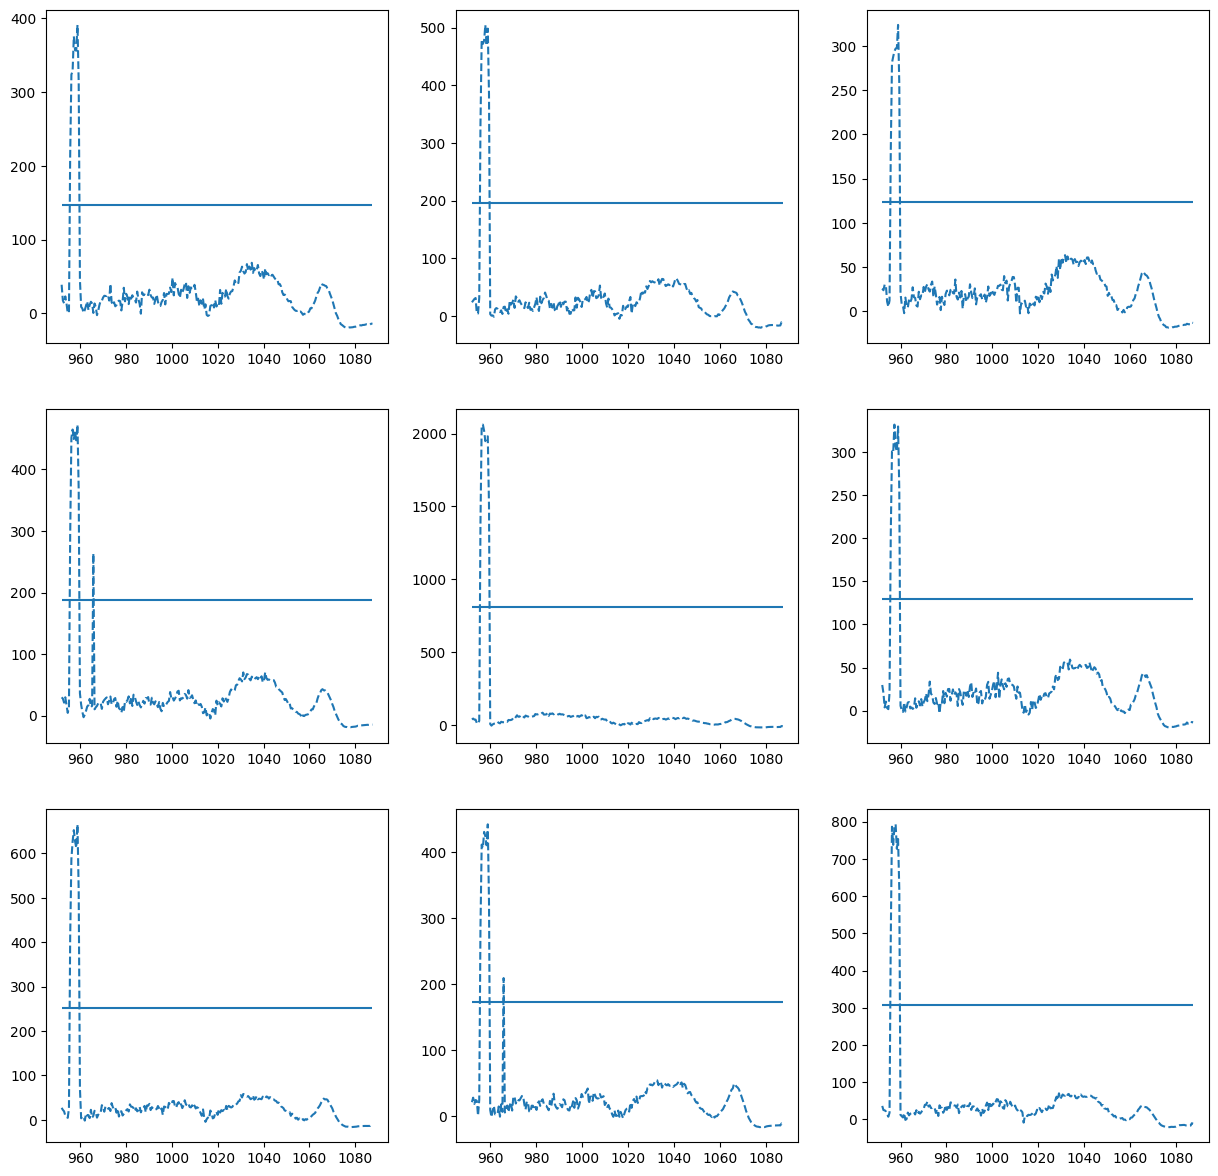

In [318]:
wf=np.array(wf)
snr=np.array(snr)
index=np.where((snr>1.6)&(snr<3))
med_low=wf[index]
plt.figure(figsize=(15,15),dpi=100)
j=0
for i in med_low:
    plt.subplot(3,3,j+1)
    #i.plot_spectrum()
    x=i.get_power()[0]
    p=i.get_power()[1]
    new=BaselineRemoval.BaselineRemoval(p).ZhangFit(itermax=100)
    base=peakutils.baseline(new,deg=6)
    base=np.where(base<0,0,base)
    rm=new-base
    print(np.where(rm>2.5*rm.std()))
    plt.hlines(2.5*rm.std(),x[0],x[-1])
    plt.plot(x,rm,'--')
    j+=1

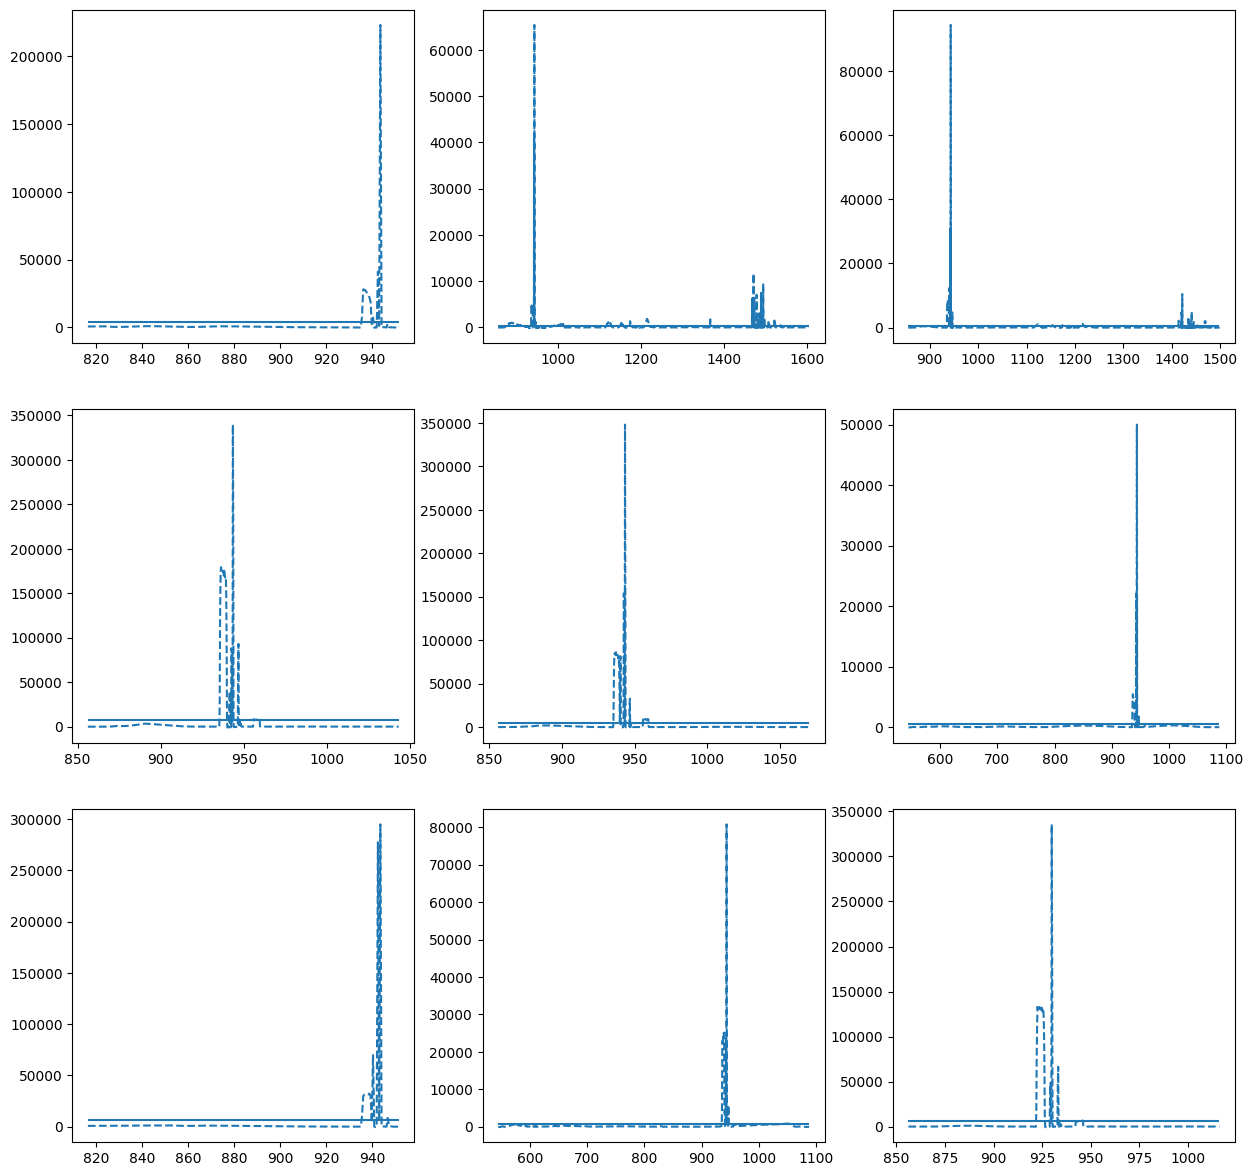

In [36]:
wf=np.array(wf)
snr=np.array(snr)
index=np.where(snr<1.6)
low=wf[index]
plt.figure(figsize=(15,15),dpi=100)
j=0
for i in low[:9]:
    plt.subplot(3,3,j+1)
    x=i.get_power()[0][1:]
    p=i.get_power()[1][1:]
    r=BaselineRemoval.BaselineRemoval(p).ZhangFit(itermax=50)
    base=peakutils.baseline(r,deg=10)
    base=np.where(base<0,0,base)
    rm=r-base
    #i.plot_spectrum()
    #print(np.where(rm>0.25*rm.std()))
    plt.hlines(0.25*rm.std(),x[0],x[-1])
    plt.plot(x,rm,'--')
    j+=1
    #print(rm.mean()/rm.std())

In [40]:
np.where(low==w)

(array([], dtype=int64),)

In [113]:
w=Waterfall(path+files[1])
f=w.get_freqs()[1:]
p=w.get_power()[1:]
r=rfi.rfi_range(w)
r

[[876.9860650523954, 876.9860650523954],
 [909.886536946616, 946.8426261000021],
 [992.659931057196, 1016.3811204419209],
 [1117.044189417448, 1174.8109991381384],
 [1208.973643628261, 1220.72011367012],
 [1366.157640304206, 1366.9334185077162],
 [1467.295083942179, 1536.8769445688297]]

extracting integration 0...
200.54819713082122


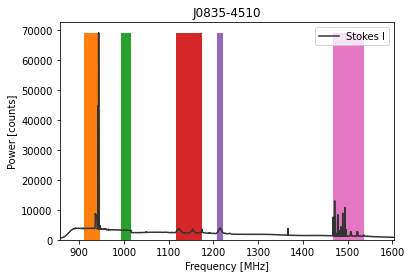

In [115]:
w.plot_spectrum()
for i in r:
    plt.bar((i[1]+i[0])/2,height=np.amax(p),width=(i[1]-i[0]))
tot=0
for i in r:
    tot+=(i[1]-i[0])
print(tot)

In [116]:
w.info()


--- File Info ---
      machine_id :                               20
    telescope_id :                               -1
       data_type :                                1
            fch1 :                        856.0 MHz
            foff :                  0.208984375 MHz
          nchans :                             3584
     source_name :                       J0835-4510
         src_raj :                       8:26:01.91
         src_dej :                      -47:14:54.5
        az_start :                              0.0
        za_start :                              0.0
           nbits :                               32
   tstart (ISOT) :          2020-07-16T15:27:21.000
    tstart (MJD) :                59046.64399305556
           tsamp :              0.00979977570093458
            nifs :                                1

Num ints in file :                              548
      File shape :                   (548, 1, 3584)
--- Selection Info ---
Data selection shape 

In [107]:
norm

251541.34595499147